**Differencing** is a method that allows to remove trend and/or seasonality in our serie
* **lag 1 differencing**: y(t)-y(t-1)
* **lag k differencing**: y(t)-y(t-k)

for a linear trend on use one differencing
for n degree poly we use n differencing to remove trend

In [1]:
import pandas as pd

In [2]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [3]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [4]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [5]:
miles_df.head()

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


In [6]:
miles_df['MilesMM_diff_1']=miles_df['MilesMM'].diff(periods=1)
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


### vérifions que la tendance a été bien supprimée


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
miles_df.index=miles_df['Month']

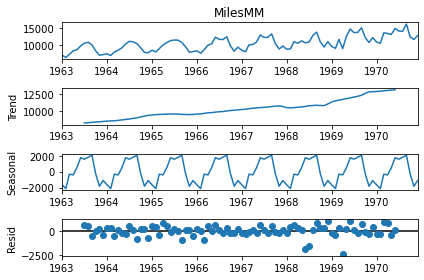

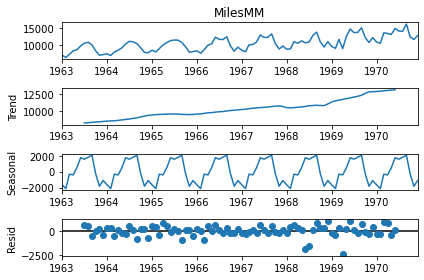

In [9]:
result_before_diff=seasonal_decompose(miles_df['MilesMM'],model='additive')
result_before_diff.plot()

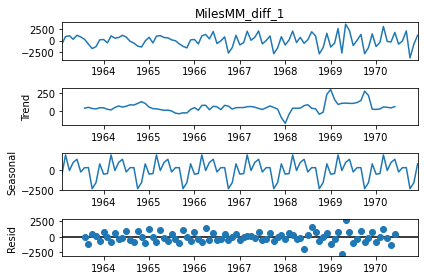

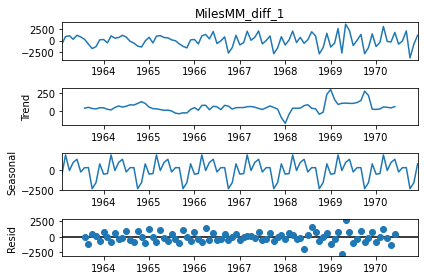

In [10]:
result_after_diff=seasonal_decompose(miles_df.iloc[1:,3],model='additive')
result_after_diff.plot()

### lets remove the seasonality

<AxesSubplot:xlabel='Month'>

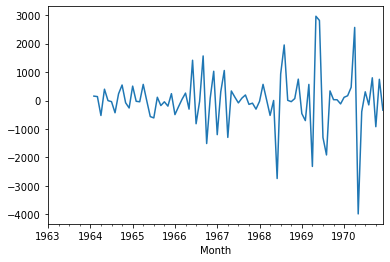

In [11]:
miles_df['MilesMM_diff_12']=miles_df['MilesMM_diff_1'].diff(periods=12)
miles_df['MilesMM_diff_12'].plot()

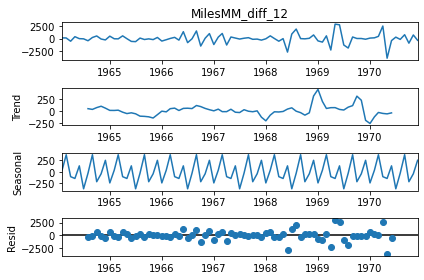

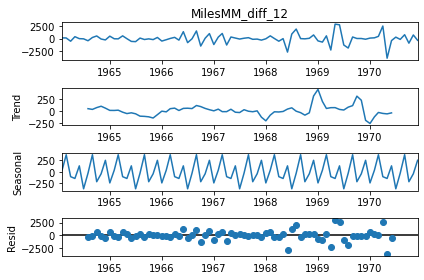

In [15]:
result_seaso=seasonal_decompose(miles_df.iloc[13:,4],model='additive')
result_seaso.plot()

In [13]:
miles_df.head(15)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN
